<h1> Chap2: 確率分布と統計モデルの最尤推定</h1>
<h1>Probability distribution and maximum likelihood estimate of statisical modelig</h1>

<p>Credit:<a href= 'http://hosho.ees.hokudai.ac.jp/~kubo/ce/IwanamiBook.html'> Original book: データ解析のための統計モデリング入門</a></p>

In [1]:
ls ../data

data_R.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline

In [3]:
df = pd.read_csv('../data/data_R.csv')

<h2>Each row represents the number of seeds each plant has</h2>
<body>
    <p>For instance, first row represents a plant whose the number of seeds is 2, second one is a plant with 2 seeds, the third one is 4 etc...</p>
</body>

In [4]:
df.head()

,seed_num
0,2
1,2
2,4
3,6
4,4


In [5]:
data = df['seed_num']

In [6]:
print(len(data))

50


In [7]:
# see the numerical summary of data
data.describe()

count    50.00000
mean      3.56000
std       1.72804
min       0.00000
25%       2.00000
50%       3.00000
75%       4.75000
max       7.00000
Name: seed_num, dtype: float64

In [8]:
# see the unique number of each value
counts = np.unique(data, return_counts=True)
print(counts)

(array([0, 1, 2, 3, 4, 5, 6, 7]), array([ 1,  3, 11, 12, 10,  5,  4,  4]))


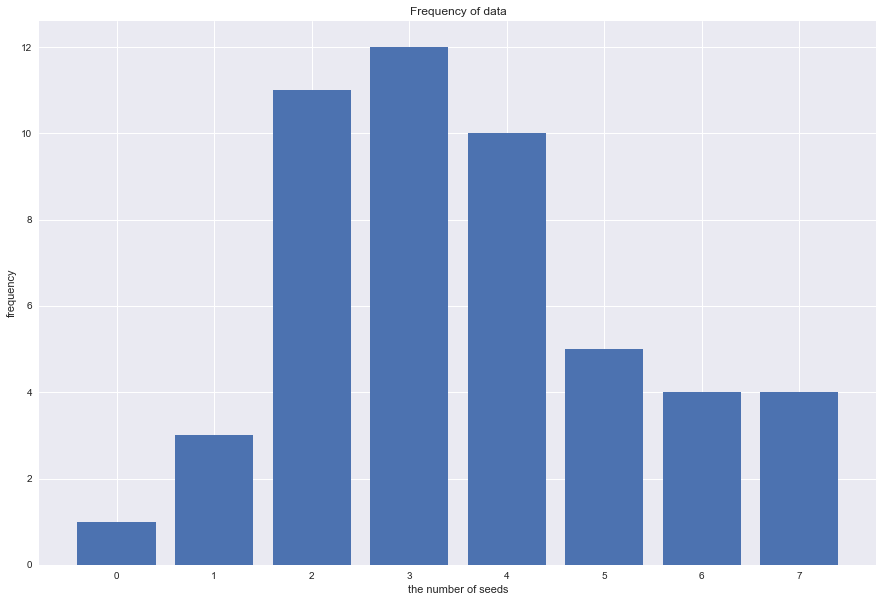

In [9]:
# plot the barplot of the number of seeds
plt.figure(figsize=(15, 10))
plt.bar(counts[0], counts[1])
plt.xlabel('the number of seeds')
plt.ylabel('frequency')
plt.title('Frequency of data')
plt.show()

<a href="https://en.wikipedia.org/wiki/Bessel%27s_correction">
    Why use N-1 instead of N to estimate the variance? Bessel's correction </a>

In [10]:
print("Biased estimator of variance ", np.round(np.var(data, ddof=0), 3))
print("Unbiased estimator of variance ", np.round(np.var(data, ddof=1),3))
print("Biased estimator of standard deviation",np.round(np.std(data, ddof=0),3))
print("Unbiased estimator of variance",np.round(np.std(data, ddof=1),3))
# print("Unbiased estimator of variance",np.sqrt(np.var(data, ddof=1)))

Biased estimator of variance  2.926
Unbiased estimator of variance  2.986
Biased estimator of standard deviation 1.711
Unbiased estimator of variance 1.728


In [11]:
from scipy.stats import poisson

<h2>Use Poisson distribution to describe data</h2>

<h3>A formula of poisson distribution: $\Pr$(x|$\lambda) = \frac{\lambda^xe(-\lambda)}{x!}$</h3>

<body>
    <p>Property<p>
    <ol>
        <li>$\lambda$=mean($\mu$)=variance($\sigma^2$)</li>
        <li>$\lambda$ takes non-negative integer: $\lambda\geq$ 0</li>
        <li>$\sum_{i=1}^{\infty} \frac{\lambda^xe(-\lambda)}{x!}$ = 1 (probability sums to 1 for taking every possible 
            number of non-negative integers)</li>
    </ol>
</body>

<h2>PMF of Poisson with  $\lambda$ =3.56</h2>

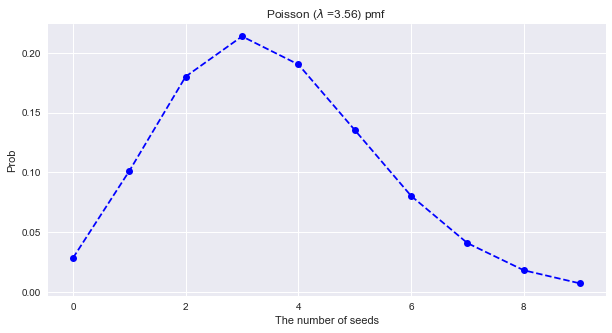

In [12]:
rv = poisson(mu=3.56)
x = np.arange(10)
plt.figure(figsize=(10,5))
plt.plot(rv.pmf(x), 'bo--')
plt.xlabel("The number of seeds")
plt.ylabel("Prob")
plt.title("Poisson ($\lambda$ =3.56) pmf")
plt.show()

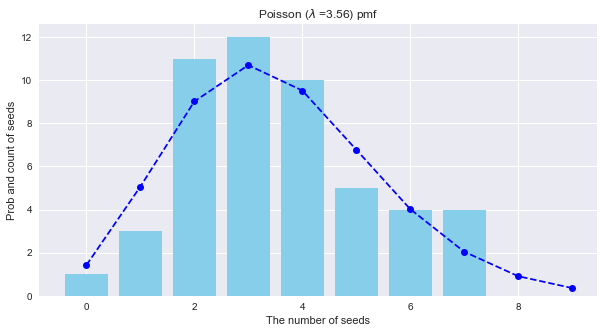

In [13]:
plt.figure(figsize=(10,5))
plt.bar(counts[0], counts[1], color='skyblue')
plt.plot(rv.pmf(x) * len(data), 'bo--')
plt.xlabel("The number of seeds")
plt.ylabel("Prob and count of seeds")
plt.title("Poisson ($\lambda$ =3.56) pmf")
plt.show()

<h2>PMFs of Poisson with  $\lambda$ =3.56,7.7,15.1</h2>

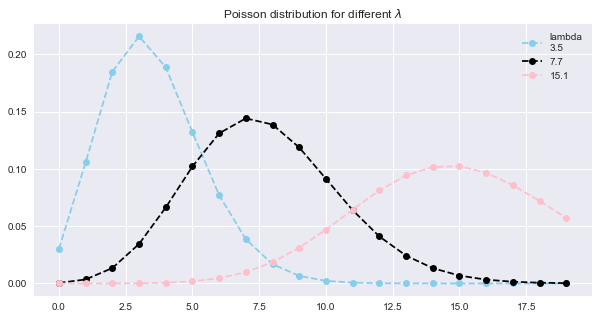

In [14]:
lambdas = [3.5, 7.7, 15.1]
colors = ['skyblue', 'black', 'pink']
x = np.arange(0, 20)
plt.figure(figsize=(10, 5))
for i, mu in enumerate(lambdas):
    rv = poisson(mu=mu)
    if i == 0:
        extra_label = 'lambda\n'
    else:
        extra_label = ''
    plt.plot(rv.pmf(x), 'bo--', color=colors[i], label=extra_label+str(mu))
plt.title("Poisson distribution for different $\lambda$")
plt.legend()
plt.show()

<h1>Maximum likelihood estimate</h1>
<body>
    <p>MLE (maximum likelihood estimate) tries to infer the value of parameters of probabiliy distribution<br> (in this 
         example, $\lambda$ whic is a parameter of poisson distribution) that would maximize the likelihood of data</p>
    <p>In poisson distribution, likelihood function is: L($\lambda$)= $\Pr$(X|$\lambda)$</p>
    <p>If we denote each data X<sub>i</sub> for each i (denoting index) and each sample is conditionally indepenent(that is to say, an occurence of first sample does not affect the probability of any other occurence of samples under a probability function), L($\lambda$) is a joint probabiliy:
    L($\lambda$)= $\Pr$(X<sub>1</sub> |$\lambda)$ * $\Pr$(X<sub>2</sub> |$\lambda)$* ..... * $\Pr$(X<sub>50</sub> |$\lambda)$ </p><br>
    <p>=$\prod_{i}^{50}\Pr$(X<sub>i</sub> |$\lambda))$ =  $\prod_{i}^{50}\frac{\lambda^xe(-\lambda)}{x!}$</p>
<br>
    <p>Take the naural log of likelihood function: logL($\lambda)$ = $\sum_{i=1}^{50}$*(x<sub>i</sub>*log$\lambda-\lambda-\sum_{k=0}^{x<sub>i</sub>}$*logk)</p>
    <a href='https://top.quora.com/What-is-the-advantage-of-using-the-log-likelihood-function-versus-the-likelihood-function-for-maximum-likelihood-estimation'>Why take the log of function</a>
    <br>
    <p>Since log function is monotonically increasing when base is > 1, maximizing the function corresponds to taking a partial derivative of the function w.r.t $\lambda$ and set it to 0</p>
    <p>$\frac{\partial log*L(\lambda)}{\partial \lambda}$ = 0<p>
    <p>$\hat{\lambda}$=$\frac{1}{50}*\sum_{i=1}^{50}$*x<sub>i</sub>=sample mean of data<p>
</body>

In [23]:
def maximum_likelihood_estimater(data, mus):
    """Plot the poisson distribution with different $\lambda$ and 
       each corresponding log-likelihood estimate
    
    # Arguments
        data: 50 samples of plants
        mus: different lambda for a poisson distribution
    """
    
    counts = np.unique(data, return_counts=True)
    fig = plt.figure()
    plt.figure(figsize=(15, 10))
    for i, mu in enumerate(mus):
        plt.subplot(3, 3, i+1)
        fig.suptitle("Maximum log-likelihood estimation for different $\lambda$")
        rv = poisson(mu=mu)
        probs = rv.pmf(np.arange(np.max(data)+2)) 
        log_l = np.log(np.prod(rv.pmf(data)))
        plt.bar(counts[0], counts[1], color='skyblue')
        plt.plot(probs * len(data), 'bo--', label='lambda={0:.1f}\n {1:.1f}'.format(mu, log_l))
        plt.legend(loc='upper right')
    plt.suptitle("Maximum log-likelihood estimation for different $\lambda$")
    plt.show()

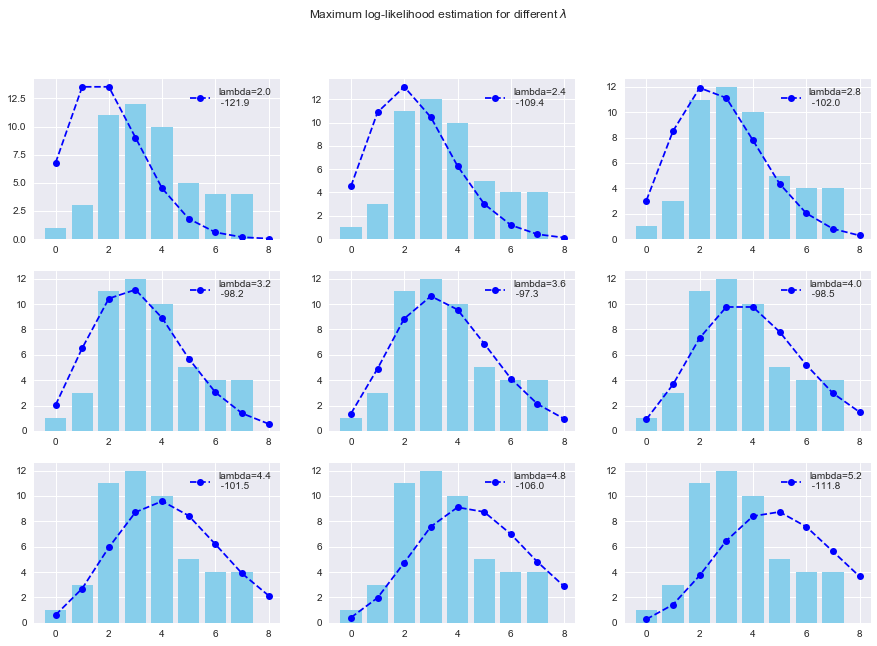

In [16]:
mus =np.arange(2.0, 5.4, 0.4)
maximum_likelihood_estimater(data, mus)

In [17]:
def maximum_likelihood_estimater(data, mus):
    """Same as the function above. This one explicitly shows calculatation of log-likelihood estimates using numpy"""
    fig = plt.figure()
    fig.suptitle("Log likelihood function for different \$lambda")
    plt.figure(figsize=(15, 10))
    for i, mu in enumerate(mus):
        plt.subplot(3, 3, i+1)
        rv = poisson(mu=mu)
        probs = rv.pmf(np.arange(np.max(data)+2)) 
        k_arrays = [np.arange(1, i+1) for i in data]
        log_sum_arrays = [np.sum(np.log(k_arrays[i]))for i in range(len(k_arrays))]
        log_l = np.sum(data * np.log(mu) - mu - log_sum_arrays)
        plt.bar(counts[0], counts[1], color='skyblue')
        plt.plot(probs * len(data), 'bo--', label='lambda={0:.1f}\n {1:.1f}'.format(mu, log_l))
        plt.legend(loc='upper right')
    plt.show()

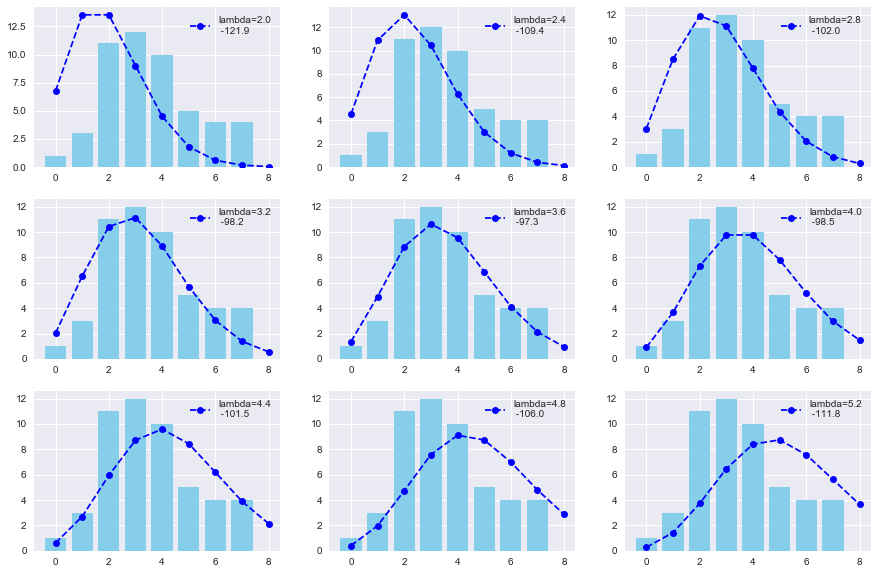

In [18]:
mus =np.arange(2.0, 5.4, 0.4)
maximum_likelihood_estimater(data, mus)

<h1>Log-likelihood estimater of each $\lambda$</h1>

In [24]:
def log_likelihood(data):
    """log-lilelihood esimater of each lambda. 
       lambda hat is the maximum-likelihood estimate of lambda
    
    # Arguments
        data: 50 samples of plants
    """
    mus = np.arange(2.0, 5.5, 0.5)
    log_ls = []
    for mu in mus:
        rv = poisson(mu=mu)
        log_l = np.sum(np.log(rv.pmf(data)))
        log_ls.append(log_l)
    plt.figure(figsize=(10, 5))
    plt.plot(mus, log_ls, 'bo--')
    plt.vlines(x=mus[np.argmax(log_ls)], ymin=np.min(log_ls), ymax=np.max(log_ls), linestyle='dashed')
    plt.ylabel("Log likelihood")
    plt.ylim(np.min(log_ls), np.max(log_ls))
    plt.annotate("$\^\lambda$", xy=(3.5, np.min(log_ls)), xytext=(4.0, np.min(log_ls) + 0.5),
                 arrowprops=dict(facecolor='black', shrink=0.07))
    plt.title("Maximum likelihood estimation")

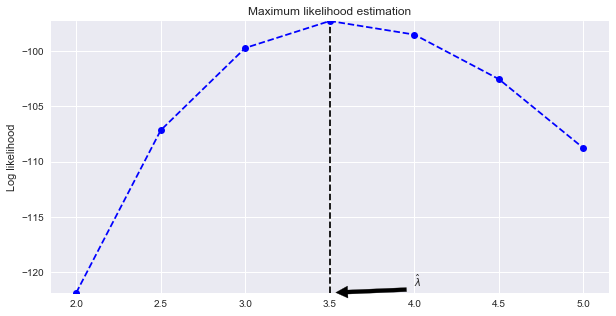

In [20]:
log_likelihood(data)

<h1>Sample distribution of log-likelihood estimate $\lambda$=3.56</h1>
<body>Randnom data is generated 3000 times using a poisson with $\lambda$=3.56 and each time
  we estimate $\lambda$ (denoted by $\hat{\lambda}$) using maximum log-likelihood estimate. Variabiliy of sampling distribution shows the 
  standard error of $\hat{\lambda}$</body>

In [25]:
def calc_se(data, mu, size, num_of_samples, precision):
    """
    This function shows the sampling distribution of an estimated lambda for 3000 data sets
    
    # Arguments
        data: 50 samples of plants
        mu: value of lambda from which sample data is generated
        size: the number of samples for each random sampling 
        num_of_samples: the number of random generations 
        precision: truncate the Nth after the decimal point if precision = N
    """
    mus = []
    for sample in range(num_of_samples):
        generated_data = poisson.rvs(mu=mu, size=size)
        mu_hat = np.sum(generated_data) / size
        mus.append(mu_hat)
    mus = np.round(mus, precision)
    unique_mus = np.unique(mus, return_counts=True)
    plt.figure(figsize=(10, 5))
    sns.countplot(mus)
    plt.xticks(rotation=90)
    plt.xlabel("estimated $\lambda$")
    plt.title("Distribution of estimated $\lambda$ with Standard Error {0:.2f}".format(np.std(data, ddof=1)))

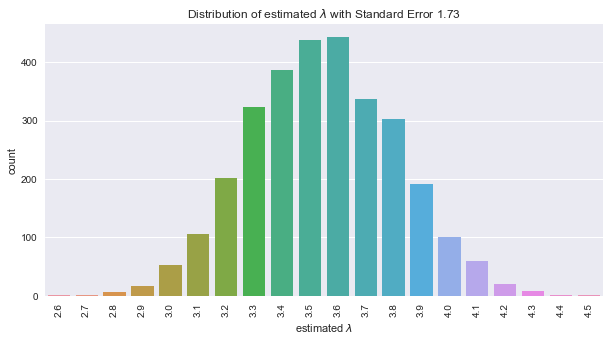

In [26]:
calc_se(data, mu=3.56,size=50, num_of_samples=3000, precision=1)